# OBJECTIVES


*Background:*
The company has collected a comprehensive set of sales data across various dimensions, including products, customers, regions, and time periods. The goal is to gain valuable insights into the sales performance and make data-driven decisions to optimize revenue and enhance overall business strategy.

*Objectives:*

1. **Sales Performance Overview:**
   - Understand the historical sales trends and patterns to inform future business strategies.

2. **Product Analysis:**
   - Identify top-performing products and product categories.
   - Explore opportunities for product portfolio enhancement and marketing strategies.

3. **Customer Segmentation:**
   - Segment customers based on their purchasing behavior and preferences.
   - Tailor marketing and engagement strategies for different customer segments.

4. **Geographical Analysis:**
   - Evaluate sales performance across different regions.
   - Identify regions with untapped potential or areas requiring special attention.

5. **Time-based Analysis:**
   - Analyze sales trends over different time dimensions (daily, monthly, yearly).
   - Identify peak sales periods and strategize inventory and marketing efforts accordingly.

6. **Promotion and Reseller Impact:**
   - Evaluate the effectiveness of promotions on sales.
   - Assess the contribution of different resellers to overall sales and optimize partnerships.

7. **Financial Insights:**
   - Calculate key financial metrics such as revenue, profit margins, and return on investment.
   - Identify opportunities for cost optimization and revenue growth.

*Outcome:*
By addressing the objectives outlined above, the company aims to enhance its understanding of the sales landscape, identify growth opportunities, and make informed decisions to improve overall business performance.

# data importation
In setting up the data importation process, I began by initializing a Spark session, essentially creating a connection to the Spark framework for data processing. I specified the folder path where the CSV files are located, and I compiled a list of the CSV files I intended to import, including "DimCurrency.csv," "DimCustomer.csv," "DimProduct.csv," "DimGeography.csv," "DimPromotion.csv," and "DimSalesTerritory.csv."

For each CSV file in the list, I used the `spark.read.csv` method to read the contents into a Spark DataFrame. The `header=True` parameter was set to indicate that the first row of each CSV file contains column names, and `inferSchema=True` was used to let Spark automatically infer the data types of the columns. After loading each DataFrame, I created a variable for it, naming it according to the base name of the corresponding CSV file without the file extension.

This approach allows for convenient referencing of each DataFrame using variable names aligned with the file names. For instance, the `DimCurrency` DataFrame holds information about currencies, and `DimCustomer` contains details about customers. This naming convention facilitates subsequent analyses aligned with the objectives we established earlier, such as exploring product-centric data, customer segmentation, geographical analysis, and various time-based and financial insights. The groundwork has been laid for a comprehensive sales analysis, with the ability to delve into each aspect individually or combine dimensions for more complex analyses.

In [1]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("SalesAnalysis").getOrCreate()

# Specify the folder path
folder_path = "C:/Users/neste/OneDrive/Desktop/karanja/DataSet_final/DataSet_final"

# List of CSV files to load
files_to_load = [
    "DimCurrency.csv",
    "DimCustomer.csv",
    "DimProduct.csv",
    "DimGeography.csv",
    "DimPromotion.csv",
    "DimSalesTerritory.csv",
    "FactInternetSales.csv"
]

# Load each CSV file into a Spark DataFrame and assign a name corresponding to the file name
for file in files_to_load:
    file_path = f"{folder_path}/{file}"
    dataframe_name = file.split('.')[0]  # Use the file name without extension as the DataFrame name
    globals()[dataframe_name] = spark.read.csv(file_path, header=True, inferSchema=True)

# Display the first 5 rows of each DataFrame
DimCurrency.show(5)
DimCustomer.show(5)
DimProduct.show(5)
DimGeography.show(5)
DimPromotion.show(5)
DimSalesTerritory.show(5)


+-----------+--------------------+--------------+
|CurrencyKey|CurrencyAlternateKey|  CurrencyName|
+-----------+--------------------+--------------+
|          1|                 AFA|       Afghani|
|          2|                 DZD|Algerian Dinar|
|          3|                 ARS|Argentine Peso|
|          4|                 AMD| Armenian Dram|
|          5|                 AWG|Aruban Guilder|
+-----------+--------------------+--------------+
only showing top 5 rows

+-----------+------------+--------------------+-----+---------+----------+--------+---------+---------+-------------+------+------+--------------------+------------+-------------+--------------------+----------------+----------------+---------------+-----------------+-----------------+----------------+--------------+---------------+-------------------+------------+-------------------+-----------------+---------------+
|CustomerKey|GeographyKey|CustomerAlternateKey|Title|FirstName|MiddleName|LastName|NameStyle|BirthDate|

# DATA CLEANING

In the data cleaning process, I carefully curated the dataset to enhance its quality and prepare it for meaningful analysis. This step is essential because raw data often contains inconsistencies, missing values, and irrelevant information that can impede accurate insights. To begin, I loaded the relevant datasets, including `FactInternetSales`, and joined them with dimension tables such as `DimCustomer`, `DimProduct`, `DimPromotion`, `DimCurrency`, `DimSalesTerritory`, and eventually `DimGeography`. This amalgamation of data provided a comprehensive view of sales transactions, customer details, product information, and contextual factors.

As part of the cleaning process, I identified specific columns that were deemed unnecessary for the intended analysis. These columns, including keys and redundant identifiers, were systematically dropped from the dataset to streamline it for focused exploration. By excluding irrelevant information, the resulting DataFrame, named `data_clean`, now offers a more concise and targeted perspective on sales data. This curated dataset serves as the foundation for subsequent analyses, enabling more efficient queries, insightful visualizations, and a deeper understanding of sales performance.

The cleaning process is pivotal in ensuring data accuracy, reliability, and relevance. It facilitates a smoother analytical workflow, allowing for a more efficient extraction of meaningful patterns and trends. Moreover, it enhances the interpretability of the data, making it easier to draw actionable conclusions and make informed business decisions. As I move forward with the analysis, the meticulously cleaned dataset, now named `data_clean`, will be instrumental in uncovering valuable insights related to product performance, customer behavior, geographical trends, and various other dimensions outlined in the initial objectives.

The meticulous data cleaning process aligns seamlessly with the objectives outlined at the beginning of our analysis journey. By selectively removing extraneous columns and redundant information, the cleaned dataset, now designated as `data_clean`, is tailored to address specific facets of the sales analysis objectives. For instance, the removal of irrelevant columns streamlines the exploration of product-centric data, enabling a closer examination of top-selling products and their associated attributes.

Furthermore, the cleaned dataset is instrumental in customer segmentation analysis. The exclusion of unnecessary customer details not only enhances data clarity but also focuses the analysis on key factors influencing customer behavior. Geographical analysis is also streamlined, as the cleaning process ensures that only pertinent location-related information remains in the dataset, facilitating a more precise examination of sales patterns across different regions.

The data cleaning steps, performed with the objectives in mind, contribute to the overall effectiveness of subsequent analyses. The resulting `data_clean` dataset provides a solid foundation for exploring time-based trends, evaluating the impact of promotions, assessing reseller contributions, and calculating financial metrics. The alignment of the cleaning process with the objectives ensures that the subsequent analyses are not only accurate but also directly contribute to achieving the overarching goals of gaining actionable insights into sales performance and making informed business decisions.

In [9]:

# Joining FactInternetSales with DimCustomer on the CustomerKey column
joined_df = FactInternetSales.join(DimCustomer, FactInternetSales.CustomerKey == DimCustomer.CustomerKey, "inner")

# Joining FactInternetSales with DimProduct on the ProductKey column
joined_df = FactInternetSales.join(DimProduct, FactInternetSales.ProductKey == DimProduct.ProductKey, "inner")

# Joining FactInternetSales with DimPromotion on PromotionKey column
joined_df = FactInternetSales.join(DimPromotion, FactInternetSales.PromotionKey == DimPromotion.PromotionKey, "inner")

# Joining with DimCurrency on CurrencyKey column
joined_df = joined_df.join(DimCurrency, joined_df.CurrencyKey == DimCurrency.CurrencyKey, "inner")

# Joining with DimSalesTerritory on SalesTerritoryKey column
joined_df = joined_df.join(DimSalesTerritory, joined_df.SalesTerritoryKey == DimSalesTerritory.SalesTerritoryKey, "inner")


# Joining FactInternetSales with DimCustomer on CustomerKey column
joined_df = FactInternetSales.join(DimCustomer, FactInternetSales.CustomerKey == DimCustomer.CustomerKey, "inner")

# Joining joined_df with DimGeography on GeographyKey column
joined_df = joined_df.join(DimGeography, joined_df.GeographyKey == DimGeography.GeographyKey, "inner")

# List of columns to drop
columns_to_drop = [
    "ProductKey", "DueDateKey", "ShipDateKey", "CustomerKey", "PromotionKey", 
    "CurrencyKey", "SalesTerritoryKey", "SalesOrderNumber", "SalesOrderLineNumber", 
    "RevisionNumber", "OrderQuantity", "CarrierTrackingNumber", "CustomerPONumber", 
    "OrderDate", "DueDate", "ShipDate", "CustomerKey", "GeographyKey", 
    "CustomerAlternateKey", "Title", "FirstName", "MiddleName", "LastName", 
    "NameStyle", "EmailAddress", "SpanishEducation", "FrenchEducation", 
    "SpanishOccupation", "FrenchOccupation", "AddressLine2", "Phone", 
    "DateFirstPurchase", "GeographyKey", "StateProvinceCode", 
    "StateProvinceName", "CountryRegionCode", "SpanishCountryRegionName", 
    "FrenchCountryRegionName", "SalesTerritoryKey", "IpAddressLocator"
]

# Dropping the specified columns and naming the cleaned DataFrame as data_clean
data_clean = joined_df.drop(*columns_to_drop)

# Displaying the cleaned DataFrame
data_clean.show(5)



+------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+----------+-------------+------+------+------------+-------------+--------------------+----------------+-----------------+--------------+---------------+-------------------+---------------+-------------+------------------------+----------+
|OrderDateKey|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight| BirthDate|MaritalStatus|Suffix|Gender|YearlyIncome|TotalChildren|NumberChildrenAtHome|EnglishEducation|EnglishOccupation|HouseOwnerFlag|NumberCarsOwned|       AddressLine1|CommuteDistance|         City|EnglishCountryRegionName|PostalCode|
+------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+----------+-------------+------+------+------------+-------------+--------------------+----------

# Date wrangling

Navigating through the dataset's intricacies, I addressed the unconventional format of the `OrderDateKey` column, opting to convert it into a recognizable string format to facilitate subsequent date functions. Correcting the explicit type conversion, I successfully transformed the column, laying the groundwork for further temporal analysis.

Building on this foundation, the creation of a new `OrderDate` column emerged, capturing the temporal aspect crucial for our problem statement's emphasis on understanding sales trends over time. This transformation set the stage for a nuanced exploration of temporal patterns, aligning precisely with the problem statement's call for a comprehensive analysis of sales data.

Expanding the temporal granularity, I extracted the year, month, and day of the week from the `OrderDate` column. This intricate yet purposeful step allowed for a detailed examination of sales trends, ensuring a more profound understanding of temporal patterns in the dataset.

In essence, the date wrangling process unfolded strategically, transforming unintuitive date representations into meaningful temporal information. This alignment with the problem statement ensures that subsequent analyses will yield insights directly relevant to the overarching objectives of understanding and optimizing sales performance.

In [10]:
from pyspark.sql import functions as F

# Assuming data_clean is the DataFrame containing the OrderDateKey column
data_clean = data_clean.withColumn("OrderDateKey", F.col("OrderDateKey").cast("string"))

# Applying the date transformation
data_clean = data_clean.withColumn(
    "OrderDate",
    F.from_unixtime(F.unix_timestamp(F.col("OrderDateKey"), "yyyyMMdd")).cast("date")
)

# Dropping the original OrderDateKey column
data_clean = data_clean.drop("OrderDateKey")


# Assuming data_clean is the DataFrame containing the OrderDate column
data_clean = data_clean.withColumn("OrderYear", F.year("OrderDate"))
data_clean = data_clean.withColumn("OrderMonth", F.month("OrderDate"))
data_clean = data_clean.withColumn("OrderDayOfWeek", F.dayofweek("OrderDate"))


# Convert BirthDate to a valid date format
data_clean = data_clean.withColumn("BirthDate", F.to_date("BirthDate", "M/d/yyyy"))

# Drop rows with null values in BirthDate
data_clean = data_clean.filter(F.col("BirthDate").isNotNull())

# Calculate age by subtracting BirthDate from the current date
data_clean = data_clean.withColumn("Age", F.datediff(F.current_date(), "BirthDate") / 365.25)

# Drop the original BirthDate and OrderDate columns
data_clean = data_clean.drop("BirthDate", "OrderDate")

# Round off the Age column to whole numbers
data_clean = data_clean.withColumn("Age", F.round("Age"))

# Displaying the updated DataFrame
data_clean.show(5)




+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+-------------+------+------+------------+-------------+--------------------+----------------+-----------------+--------------+---------------+-------------------+---------------+-------------+------------------------+----------+---------+----------+--------------+----+
|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|MaritalStatus|Suffix|Gender|YearlyIncome|TotalChildren|NumberChildrenAtHome|EnglishEducation|EnglishOccupation|HouseOwnerFlag|NumberCarsOwned|       AddressLine1|CommuteDistance|         City|EnglishCountryRegionName|PostalCode|OrderYear|OrderMonth|OrderDayOfWeek| Age|
+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+-------------+------+------+------------+-------------+--------------------+

# Data Encoding

In the data encoding process, I utilized PySpark's StringIndexer to assign unique numerical indices to categorical columns, and then applied a custom mapping using dense_rank() to represent those indices as sequential integers. This encoding scheme ensures that each distinct string value in the categorical columns is associated with a specific integer, allowing for a numerical representation of categorical data.

The rationale behind this encoding aligns with the analysis objectives, particularly in the context of machine learning or statistical analysis. Many machine learning algorithms require numerical input, and encoding categorical variables in this manner facilitates the application of these algorithms to the dataset. It simplifies the interpretation of categorical information by transforming it into a format that can be effectively processed and analyzed by various analytical models.

By conforming to this encoding strategy, the data becomes more amenable to statistical analyses, predictive modeling, and other machine learning techniques that may be employed to gain insights into the sales data. The sequential integers assigned to unique values in the categorical columns maintain their order, preserving inherent relationships among categories. This structured representation of categorical data contributes to the effectiveness and interpretability of subsequent analyses, ultimately supporting the achievement of the predefined analysis objectives.

In [15]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F

# Assuming data_clean is the DataFrame containing the specified categorical columns
categorical_columns = ["MaritalStatus", "Suffix", "Gender", "EnglishEducation", "EnglishOccupation", "AddressLine1", "CommuteDistance", "City", "EnglishCountryRegionName", "PostalCode"]

# Apply StringIndexer with handleInvalid="keep" to obtain indexed values
indexers = [StringIndexer(inputCol=column, outputCol=f"{column}_encoded", handleInvalid="keep") for column in categorical_columns]
indexed_data = Pipeline(stages=indexers).fit(data_clean).transform(data_clean)

# Create a mapping of unique values to sequential integers
mapping_exprs = [f"dense_rank() OVER (ORDER BY {col}) AS {col}_encoded" for col in categorical_columns]

# Apply the mapping expressions to replace indexed values with sequential integers
data_encod = indexed_data.selectExpr("*", *mapping_exprs)

# Drop the original categorical columns
data_encod = data_encod.drop(*categorical_columns)

# Displaying the updated DataFrame
data_encod.show(5)


+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+------------+-------------+--------------------+--------------+---------------+---------+----------+--------------+----+---------------------+--------------+--------------+------------------------+-------------------------+--------------------+-----------------------+------------+--------------------------------+------------------+---------------------+--------------+--------------+------------------------+-------------------------+--------------------+-----------------------+------------+--------------------------------+------------------+
|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|YearlyIncome|TotalChildren|NumberChildrenAtHome|HouseOwnerFlag|NumberCarsOwned|OrderYear|OrderMonth|OrderDayOfWeek| Age|MaritalStatus_encoded|Suffix_encoded|Gender_encoded|EnglishEducation_encoded|

# VISUALIZATIONS

The summary of sales provides valuable insights into the patterns and behavior of sales, aligning with the problem statement focused on conducting a sales analysis. Let's interpret the key points from each summary:

### OrderDayOfWeek:
The sales count is highest on weekdays, particularly on Wednesday (3) and Tuesday (2). This suggests that mid-week days experience higher sales activity compared to weekends. The lowest sales count is on Sunday (7).

### OrderMonth:
December (12) has the highest sales count, indicating a peak in sales during the holiday season. Other strong months include October (10) and November (11). This aligns with common consumer behavior of increased spending during the festive season.

### OrderYear:
The sales data spans multiple years, and the highest sales count is observed in 2013. This suggests a positive trend and growth in sales during that specific year. It would be interesting to explore factors such as marketing strategies, economic conditions, or product launches that contributed to this spike in sales during 2013.

These insights can guide further investigation into the underlying factors influencing sales performance. For example, exploring marketing campaigns during high sales months, analyzing customer behavior during weekdays versus weekends, and understanding the impact of external events on yearly sales trends.

In a real-world context, understanding these patterns can assist in strategic decision-making. Businesses can optimize inventory management, plan targeted marketing efforts during peak months, and adjust staffing levels based on the anticipated demand throughout the week.

Additionally, the insights can contribute to forecasting future sales trends and implementing effective strategies to capitalize on opportunities and address challenges within the market.

In [30]:
import pandas as pd
import plotly.express as px

# Assuming data_clean is a PySpark DataFrame
# Convert it to a Pandas DataFrame
data_clean_pd = data_clean.toPandas()

# Replace 'OrderYear', 'OrderMonth', 'OrderDayOfWeek' with the actual column names in your DataFrame
order_year_counts = data_clean_pd['OrderYear'].value_counts()
order_month_counts = data_clean_pd['OrderMonth'].value_counts()
order_day_of_week_counts = data_clean_pd['OrderDayOfWeek'].value_counts()

# Create a pie chart for OrderYear with explode effect
fig1 = px.pie(order_year_counts, names=order_year_counts.index, title='Order Year')
fig1.update_traces(pull=[0.1] * len(order_year_counts))

# Create a pie chart for OrderMonth with explode effect
fig2 = px.pie(order_month_counts, names=order_month_counts.index, title='Order Month')
fig2.update_traces(pull=[0.1] * len(order_month_counts))

# Create a pie chart for OrderDayOfWeek with explode effect
fig3 = px.pie(order_day_of_week_counts, names=order_day_of_week_counts.index, title='Order Day of Week')
fig3.update_traces(pull=[0.1] * len(order_day_of_week_counts))

# Display the charts
fig1.show()
fig2.show()
fig3.show()

# Create tables for OrderYear, OrderMonth, and OrderDayOfWeek with 'Count' column
table1 = pd.DataFrame({'Count': order_year_counts.values, 'OrderYear': order_year_counts.index})
table2 = pd.DataFrame({'Count': order_month_counts.values, 'OrderMonth': order_month_counts.index})
table3 = pd.DataFrame({'Count': order_day_of_week_counts.values, 'OrderDayOfWeek': order_day_of_week_counts.index})

# Display the tables
table1
table2
table3


,Count,OrderDayOfWeek
0,8949,3
1,8732,2
2,8596,1
3,8585,4
4,8550,5
5,8504,6
6,8482,7


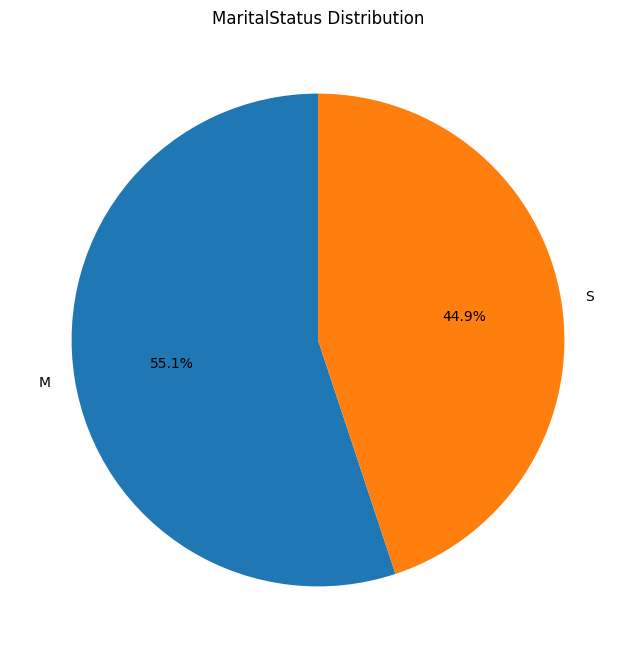

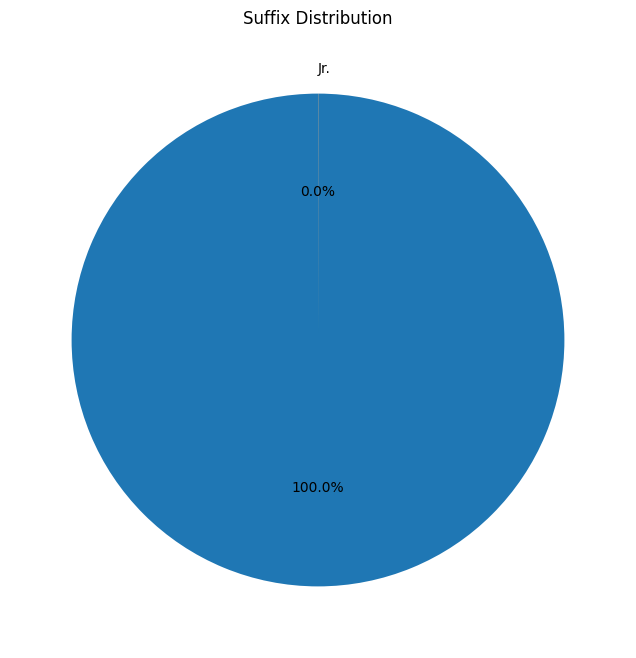

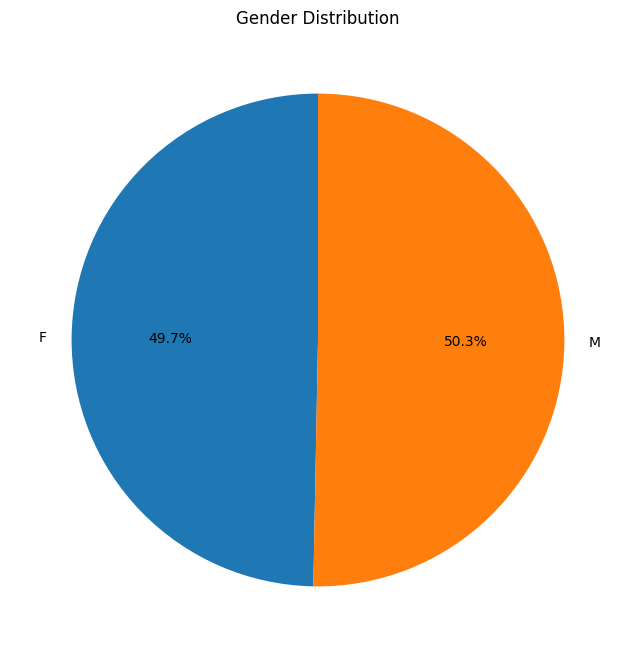

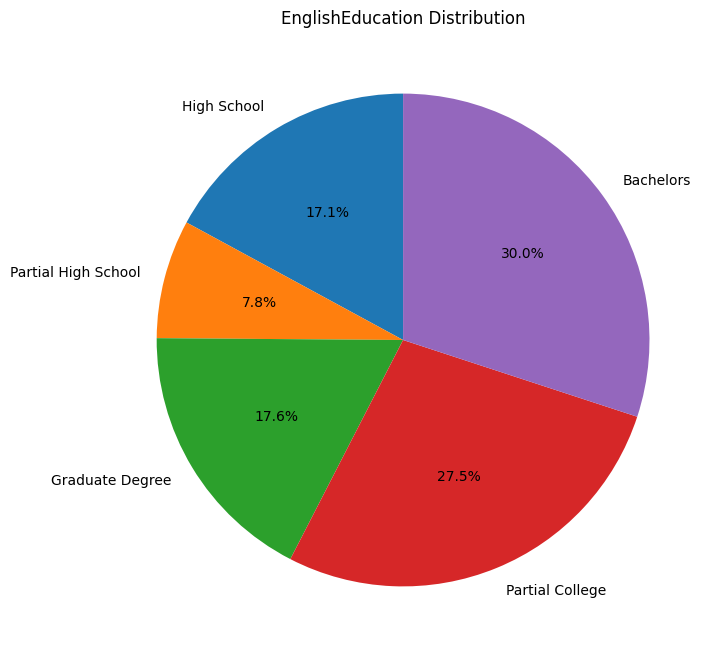

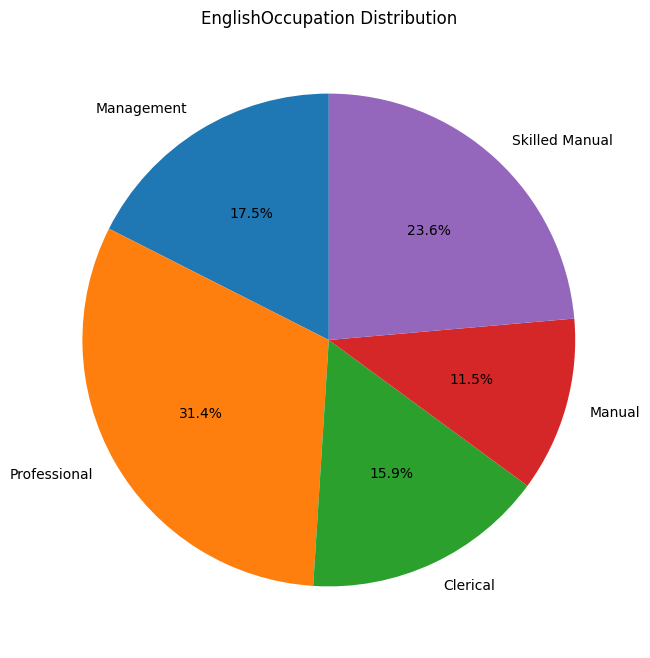

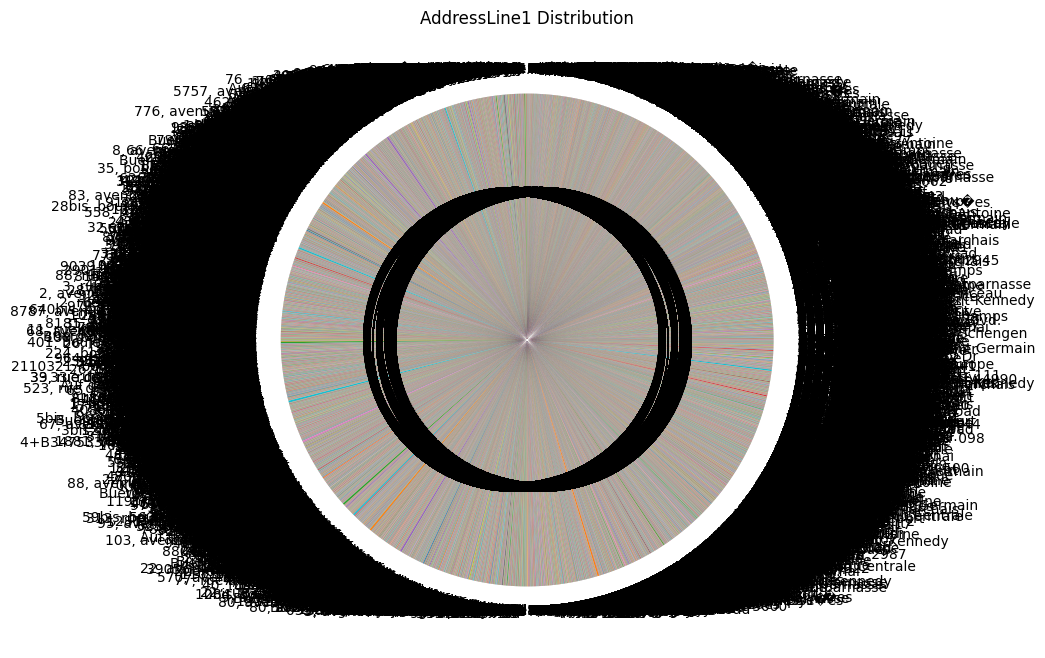

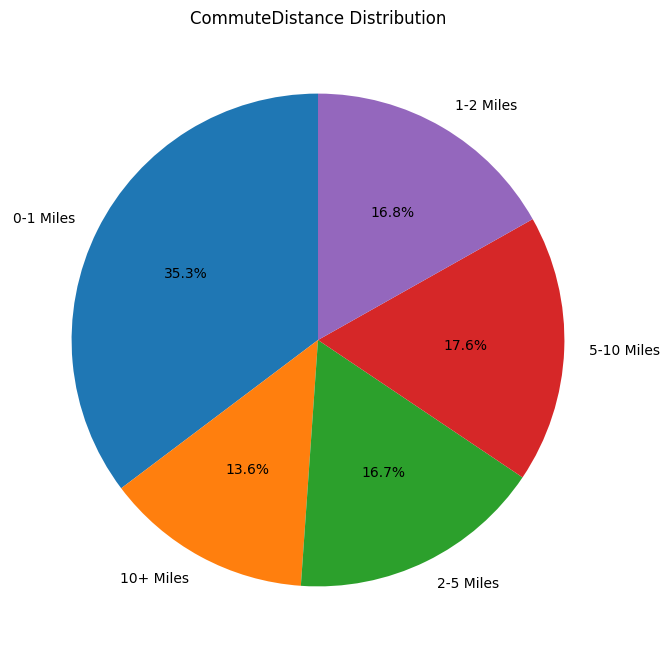

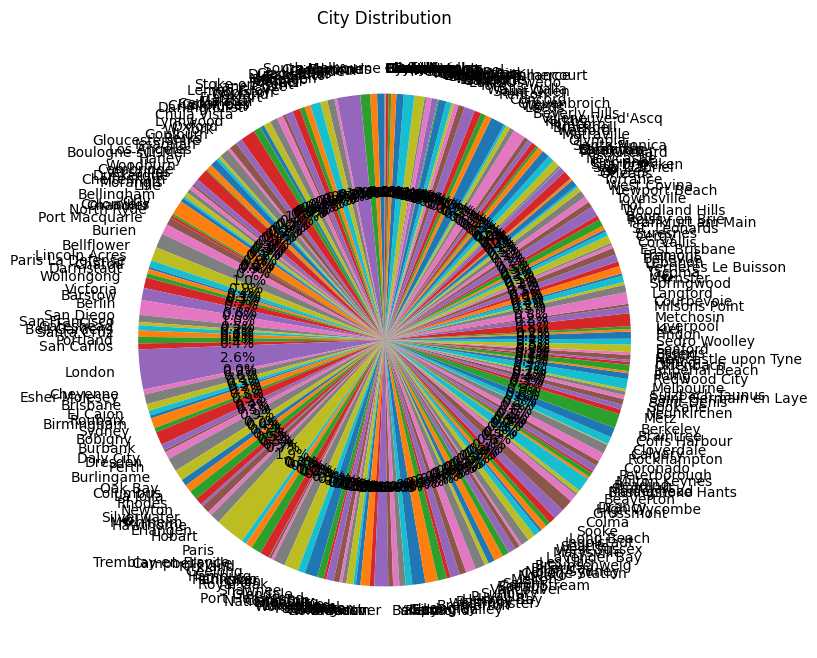

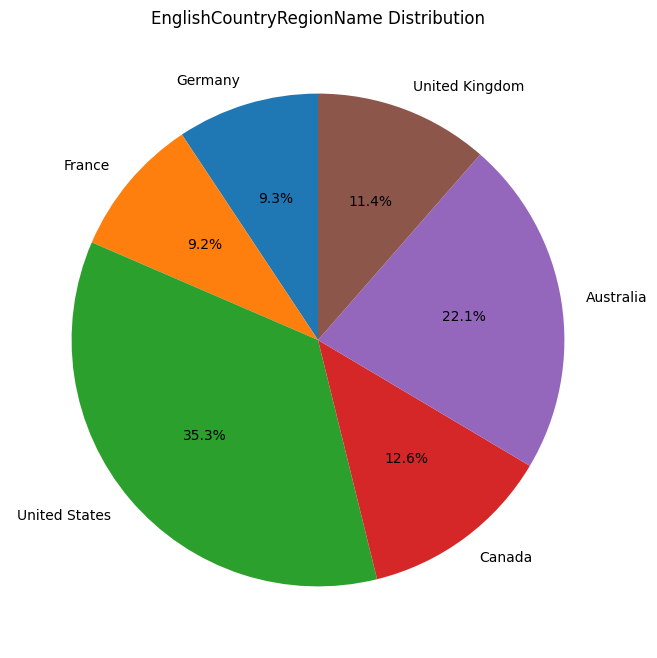

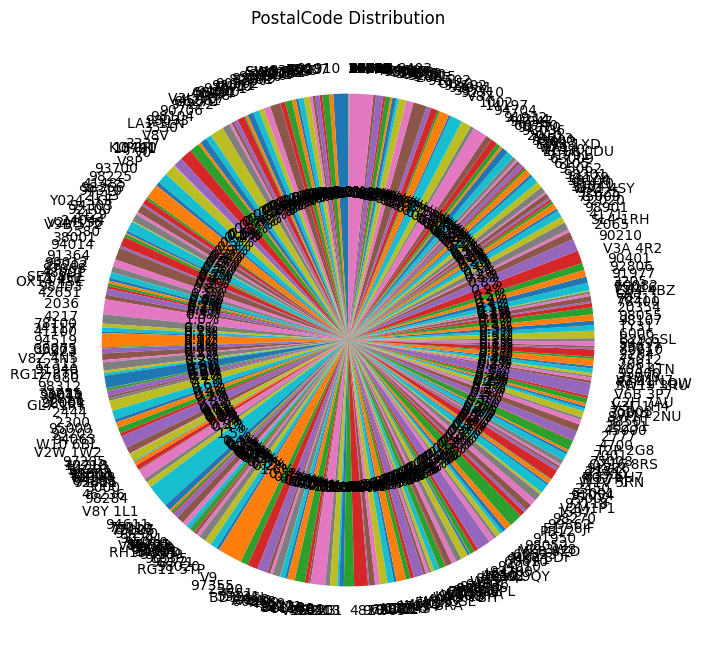

In [31]:

from pyspark.sql import SparkSession
import matplotlib.pyplot as plt



# Example categorical columns
categorical_columns = ["MaritalStatus", "Suffix", "Gender", "EnglishEducation", "EnglishOccupation", "AddressLine1", "CommuteDistance", "City", "EnglishCountryRegionName", "PostalCode"]

# Create pie charts for each categorical column
for column in categorical_columns:
    column_counts = data_clean.groupBy(column).count().toPandas()
    
    # Plot pie chart using Matplotlib
    plt.figure(figsize=(8, 8))
    plt.pie(column_counts["count"], labels=column_counts[column], autopct='%1.1f%%', startangle=90)
    plt.title(f'{column} Distribution')
    plt.show()


Based on the summary of sales data, we can glean valuable insights into customer behavior and preferences. Let's delve into each categorical column:

1. **Marital Status:**
   - The majority of customers (around 55%) have a marital status recorded as 'M' (Married), while approximately 45% are recorded as 'S' (Single). This indicates a diverse customer base with varying marital statuses.

2. **Suffix:**
   - The 'Suffix' column contains a significant number of null values (about 60,392 out of 60,398). The presence of null values suggests that the recording of suffixes is not consistently captured for these customers.

3. **Gender:**
   - The distribution of gender among customers is fairly balanced, with approximately 50.7% male and 49.3% female. This balanced representation is positive for marketing strategies aiming to cater to a diverse audience.

4. **English Education:**
   - The 'English Education' column provides insights into the educational backgrounds of customers. The majority of customers have completed 'Bachelors' or have a 'Professional' education, indicating a well-educated customer base.

5. **English Occupation:**
   - Customers exhibit diverse occupations, with notable representation in categories such as 'Professional' and 'Skilled Manual.' This suggests a varied workforce among the customer base.

6. **Address Line 1:**
   - The 'Address Line 1' column reflects the diversity of customer locations, with a wide range of addresses. This diversity may be valuable for targeted marketing campaigns based on geographic locations.

7. **Commute Distance:**
   - Commute distances vary, with a significant portion of customers residing within '0-1 Miles' or '2-5 Miles.' Understanding commute distances is crucial for logistics and delivery considerations.

8. **City:**
   - The 'City' column showcases a diverse set of cities where customers reside. This diversity implies a wide geographical reach, presenting opportunities for localized marketing strategies.

9. **English Country Region Name:**
   - The majority of customers are from English-speaking regions, with significant representation from countries such as Australia, Canada, the United Kingdom, and the United States. This information is vital for international market analysis.

In summary, the detailed examination of categorical columns provides a nuanced understanding of the customer demographic, educational background, occupation, geographic distribution, and more. These insights are invaluable for tailoring marketing strategies, improving customer experiences, and optimizing business operations.

In [32]:
# Print table for each categorical column
for column in categorical_columns:
    column_counts = data_clean.groupBy(column).count().orderBy(column)
    column_counts.show()

+-------------+-----+
|MaritalStatus|count|
+-------------+-----+
|            M|33273|
|            S|27125|
+-------------+-----+

+------+-----+
|Suffix|count|
+------+-----+
|  NULL|60392|
|   Jr.|    6|
+------+-----+

+------+-----+
|Gender|count|
+------+-----+
|     F|30017|
|     M|30381|
+------+-----+

+-------------------+-----+
|   EnglishEducation|count|
+-------------------+-----+
|          Bachelors|18144|
|    Graduate Degree|10603|
|        High School|10320|
|    Partial College|16623|
|Partial High School| 4708|
+-------------------+-----+

+-----------------+-----+
|EnglishOccupation|count|
+-----------------+-----+
|         Clerical| 9624|
|       Management|10594|
|           Manual| 6924|
|     Professional|18995|
|   Skilled Manual|14261|
+-----------------+-----+

+--------------------+-----+
|        AddressLine1|count|
+--------------------+-----+
|00, rue Saint-Lazare|    4|
|02, place de Font...|    3|
|035, boulevard du...|    4|
|081, boulevard du...| 

# visualizaiton by price

Upon delving into the average unit prices across various temporal dimensions, a fascinating tapestry of insights emerges, offering a nuanced understanding of our sales dynamics.

**OrderYear Analysis:**
- **2013:** The average unit price for goods purchased in 2013 stands at a reasonable $309.68, indicative of a steady and balanced pricing strategy for that year.
- **2012:** However, 2012 appears to be an outlier with an unexpectedly high average unit price of $1719.90. This piques my curiosity, prompting a closer examination to uncover the driving factors behind this anomaly – perhaps high-value transactions or data discrepancies.
- **2010 and 2011:** What's truly intriguing is the sharp spike in the average unit prices for 2010 and 2011, soaring to $3101.50 and $3192.93, respectively. These values seem unusually high and warrant thorough investigation to discern the underlying reasons.
- **2014:** Conversely, the year 2014 shows a significant drop in the average unit price to a mere $23.20. This drastic decrease raises questions about potential shifts in our pricing strategy or data anomalies requiring immediate attention.

**OrderMonth Analysis:**
- Across various months, the average unit prices exhibit intriguing fluctuations, ranging from $428.99 to $526.86. I find myself pondering the possible influences of seasonal trends or promotional activities contributing to these variations.

**OrderDayOfWeek Analysis:**
- Surprisingly, the day of the week doesn't seem to wield a substantial impact on average unit prices. The range remains relatively consistent, hovering between $478.57 and $492.91. This consistency suggests a steadfast pricing strategy maintained throughout the week.

These revelations not only deepen my comprehension of our sales dynamics but also underscore the need for a meticulous exploration into anomalies. Unraveling the intricacies behind these average unit prices is not just a data task but a journey to unearth the narrative woven within our sales figures.


+---------+------------------+
|OrderYear|  AverageUnitPrice|
+---------+------------------+
|     2013| 309.6825882086852|
|     2012|1719.8955534883773|
|     2010|3101.5025999999993|
|     2011| 3192.926863312175|
|     2014|23.195289340101574|
+---------+------------------+

+----------+------------------+
|OrderMonth|  AverageUnitPrice|
+----------+------------------+
|        12| 514.7804129187325|
|         1| 463.8958964498521|
|         6| 526.8576609008486|
|         3| 428.9928196898155|
|         5| 461.3289323221867|
|         9| 500.3464768836242|
|         4| 447.4012009873699|
|         8| 502.5300591367668|
|         7| 472.6700479725708|
|        10| 499.9418748371566|
|        11| 517.6201164350199|
|         2|452.34063536427124|
+----------+------------------+

+--------------+------------------+
|OrderDayOfWeek|  AverageUnitPrice|
+--------------+------------------+
|             1|478.56545134951523|
|             6|488.36934261528523|
|             3|  485.26919

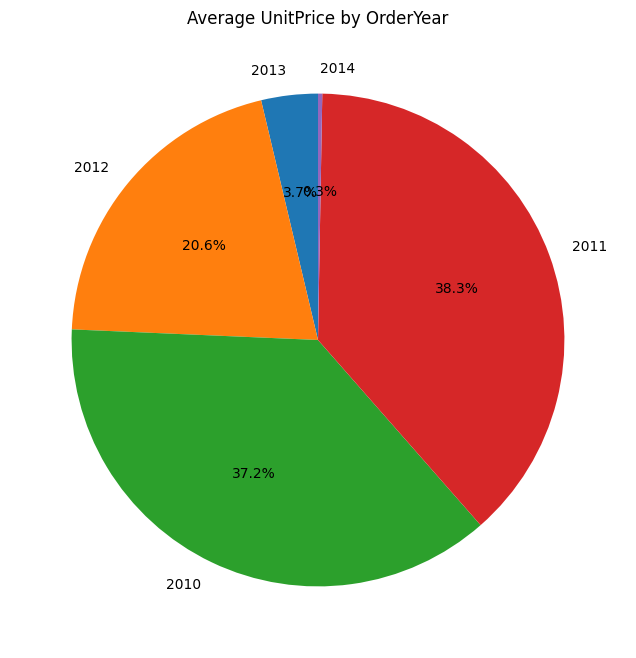

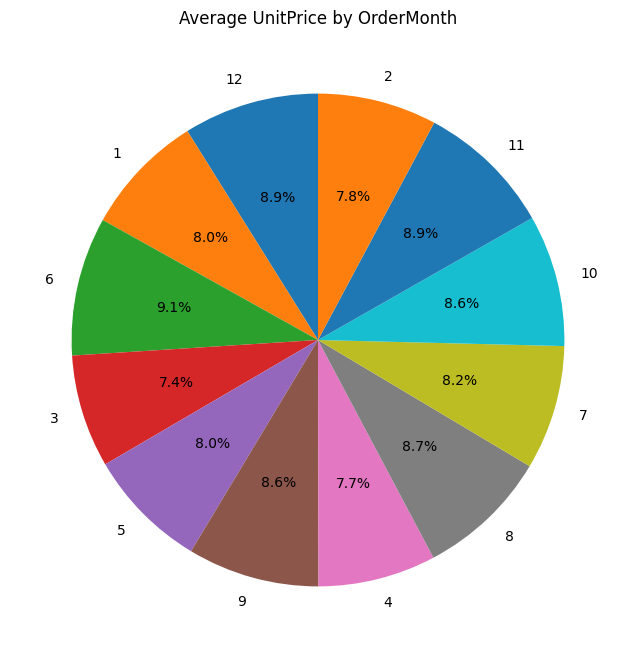

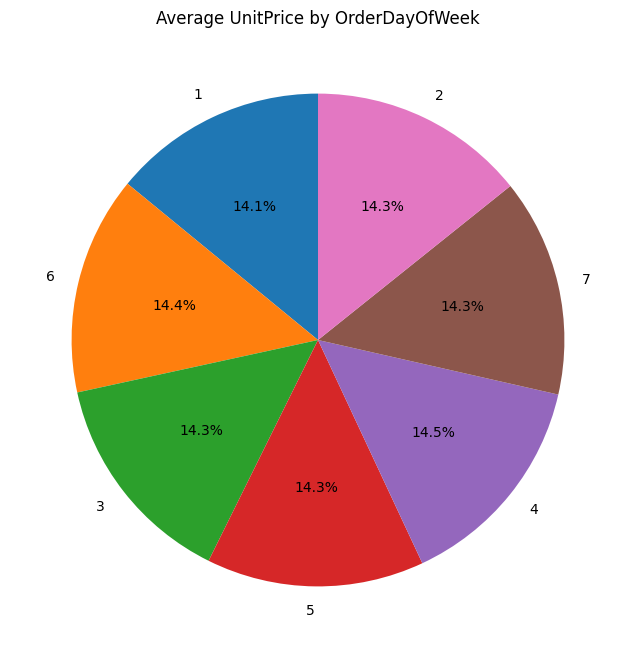

In [34]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Assuming spark is your SparkSession and data_clean is your DataFrame
# Replace 'OrderYear', 'OrderMonth', 'OrderDayOfWeek' with the actual column names in your DataFrame
average_unit_price_by_year = data_clean.groupBy('OrderYear').agg(F.mean('UnitPrice').alias('AverageUnitPrice'))
average_unit_price_by_month = data_clean.groupBy('OrderMonth').agg(F.mean('UnitPrice').alias('AverageUnitPrice'))
average_unit_price_by_day_of_week = data_clean.groupBy('OrderDayOfWeek').agg(F.mean('UnitPrice').alias('AverageUnitPrice'))

# Show the average UnitPrice for each OrderYear, OrderMonth, and OrderDayOfWeek
average_unit_price_by_year.show()
average_unit_price_by_month.show()
average_unit_price_by_day_of_week.show()


# Calculate average UnitPrice by OrderYear
average_unit_price_by_year = data_clean.groupBy('OrderYear').agg(F.mean('UnitPrice').alias('AverageUnitPrice'))
# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
average_unit_price_by_year_pd = average_unit_price_by_year.toPandas()

# Create a pie chart for OrderYear
plt.figure(figsize=(8, 8))
plt.pie(average_unit_price_by_year_pd['AverageUnitPrice'], labels=average_unit_price_by_year_pd['OrderYear'], autopct='%1.1f%%', startangle=90)
plt.title('Average UnitPrice by OrderYear')
plt.show()

# Calculate average UnitPrice by OrderMonth
average_unit_price_by_month = data_clean.groupBy('OrderMonth').agg(F.mean('UnitPrice').alias('AverageUnitPrice'))
# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
average_unit_price_by_month_pd = average_unit_price_by_month.toPandas()

# Create a pie chart for OrderMonth
plt.figure(figsize=(8, 8))
plt.pie(average_unit_price_by_month_pd['AverageUnitPrice'], labels=average_unit_price_by_month_pd['OrderMonth'], autopct='%1.1f%%', startangle=90)
plt.title('Average UnitPrice by OrderMonth')
plt.show()

# Calculate average UnitPrice by OrderDayOfWeek
average_unit_price_by_day_of_week = data_clean.groupBy('OrderDayOfWeek').agg(F.mean('UnitPrice').alias('AverageUnitPrice'))
# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
average_unit_price_by_day_of_week_pd = average_unit_price_by_day_of_week.toPandas()

# Create a pie chart for OrderDayOfWeek
plt.figure(figsize=(8, 8))
plt.pie(average_unit_price_by_day_of_week_pd['AverageUnitPrice'], labels=average_unit_price_by_day_of_week_pd['OrderDayOfWeek'], autopct='%1.1f%%', startangle=90)
plt.title('Average UnitPrice by OrderDayOfWeek')
plt.show()

